# G3Py: Generalized Graphical Gaussian Processes in Python

## Imports and Sunspots Dataset

/opt/anaconda3/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.

Total: 309 | Obs: 30 (9.70873786407767%)


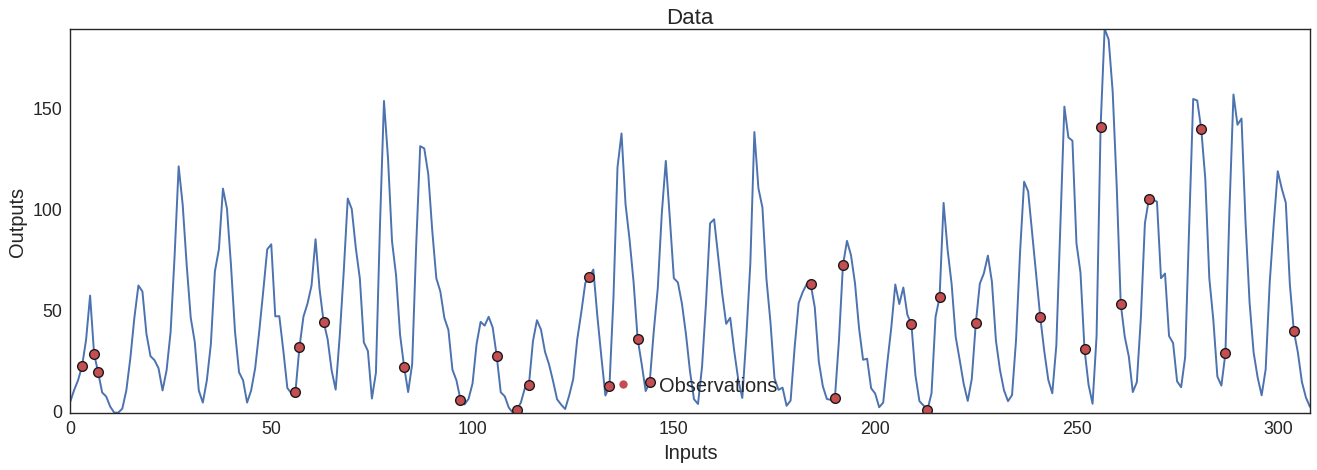

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
import g3py as g3
import pymc3 as pm
import theano as th
import theano.tensor as tt

g3.style_normal()
g3.style_widget()

psamples = 0.1
data = 'subspots'


if data == 'subspots':
    x, y = g3.data_sunspots()
else:
    x, y = g3.data_heart()


obs_j, x_obs, y_obs, test_j, x_test, y_test = g3.random_obs(x, y, psamples, plot=True)

## Define Prior Distribution

{'GP_Bias_Bias': 0.5,
 'GP_Noise_var_log_': array(-1.3862943649291992, dtype=float32),
 'GP_SE_rate_log_': array([-0.69314718], dtype=float32),
 'GP_SE_var_log_': array(-1.3862943649291992, dtype=float32)}
array(-1.9313116073608398, dtype=float32)


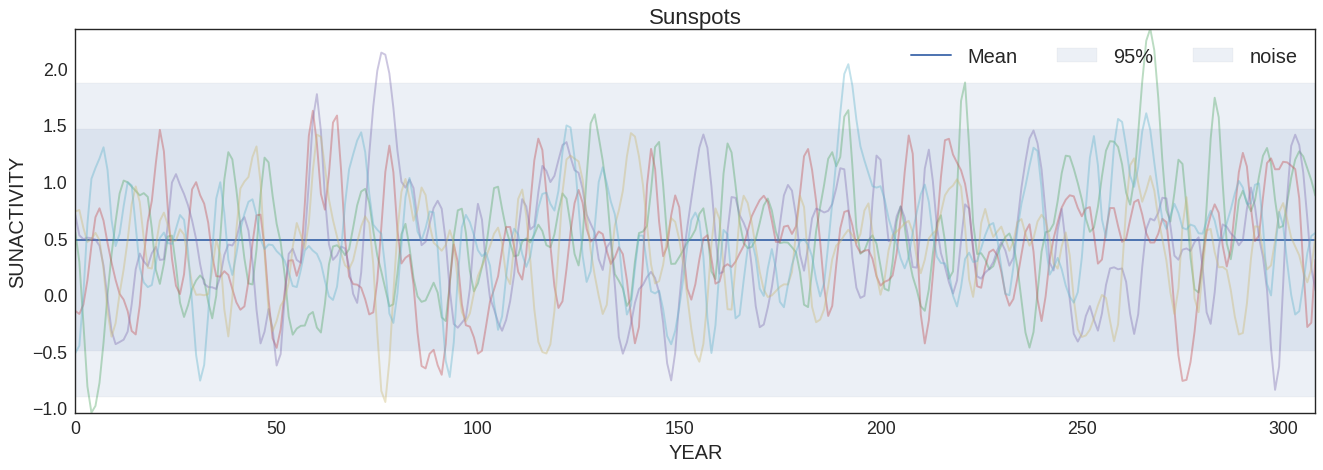

In [2]:
gp = g3.GaussianProcess(space=x, location=g3.Bias(), kernel=g3.SE(), noisy=True)
gp.describe('Sunspots', 'YEAR', 'SUNACTIVITY')
gp.plot(samples=5)
g3.print(gp.params, gp.logp(gp.params))

## Default Posterior Distribution, given observations (automatic parameters)

{'GP_Bias_Bias': 41.506668,
 'GP_Noise_var_log_': array(7.1248602867126465, dtype=float32),
 'GP_SE_rate_log_': array([-3.03296161], dtype=float32),
 'GP_SE_var_log_': array(7.1248602867126465, dtype=float32)}
array(-150.38575744628906, dtype=float32)
{'_l1': 31.344344605134143, '_l2': 1599.3109605847733}


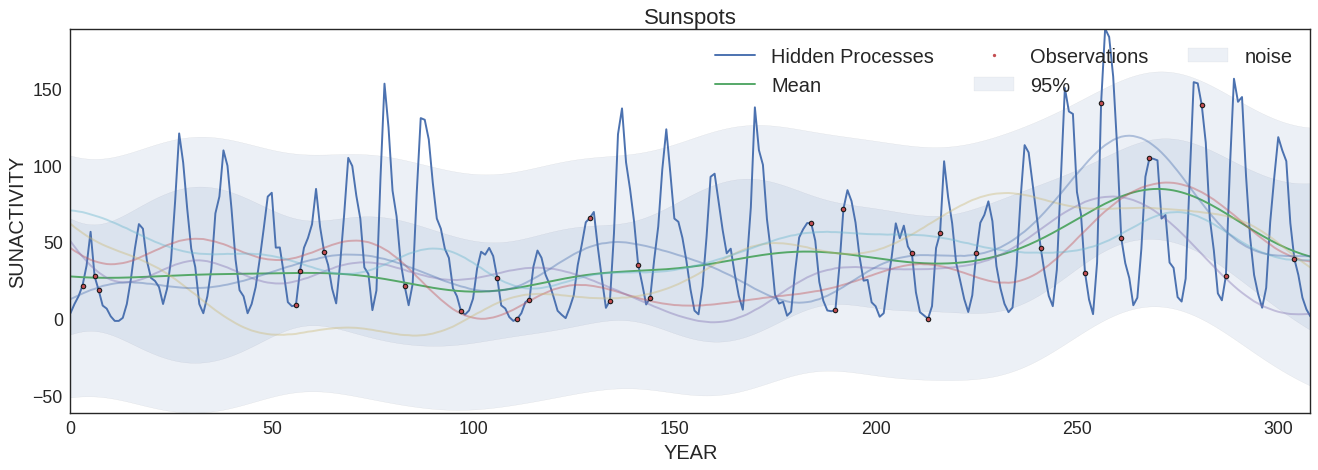

In [3]:
gp.observed(inputs=x_obs, outputs=y_obs, hidden=y)
gp.plot(samples=5)
g3.print(gp.params, gp.logp(gp.params), gp.scores(gp.params))

## Manual Search of parameters

In [4]:
gp.widget(samples=5)

## Change style and get widget params

{'GP_Bias_Bias': 41.506668,
 'GP_Noise_var_log_': array(7.1248602867126465, dtype=float32),
 'GP_SE_rate_log_': array([-3.03296161], dtype=float32),
 'GP_SE_var_log_': array(7.1248602867126465, dtype=float32),
 '_l1': 31.344344605134143,
 '_l2': 1599.3109605847733,
 '_ll': array(-150.38575744628906, dtype=float32)}

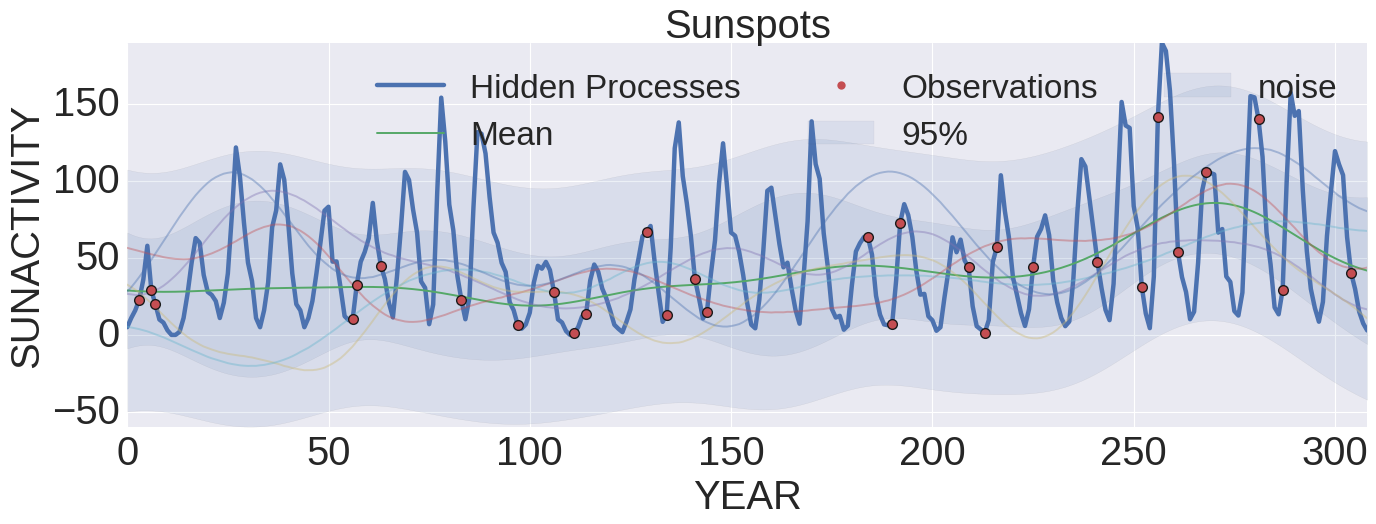

In [5]:
g3.style_big_seaborn()
gp.plot(gp.params_widget, samples=5)
gp.eval_params(gp.params_widget)

## Default find_MAP with derivative methods and free-derivative methods

In [6]:
params_map = gp.find_MAP(points=2)

'Starting function value (-logp): 150.386'
'start_bfgs'
         Current function value: 147.698120
         Iterations: 18
         Function evaluations: 123
         Gradient evaluations: 111
'start_powell'
Optimization terminated successfully.
         Current function value: 147.699387
         Iterations: 3
         Function evaluations: 163
{'GP_Bias_Bias': array(42.641117095947266, dtype=float32),
 'GP_Noise_var_log_': array(6.862150192260742, dtype=float32),
 'GP_SE_rate_log_': array([-4.4641223], dtype=float32),
 'GP_SE_var_log_': array(5.809782028198242, dtype=float32)}


{'GP_Bias_Bias': array(42.641117095947266, dtype=float32),
 'GP_Noise_var_log_': array(6.862150192260742, dtype=float32),
 'GP_SE_rate_log_': array([-4.4641223], dtype=float32),
 'GP_SE_var_log_': array(5.809782028198242, dtype=float32),
 '_l1': 31.937611492860661,
 '_l2': 1673.1990853102895,
 '_ll': array(-147.6981201171875, dtype=float32)}


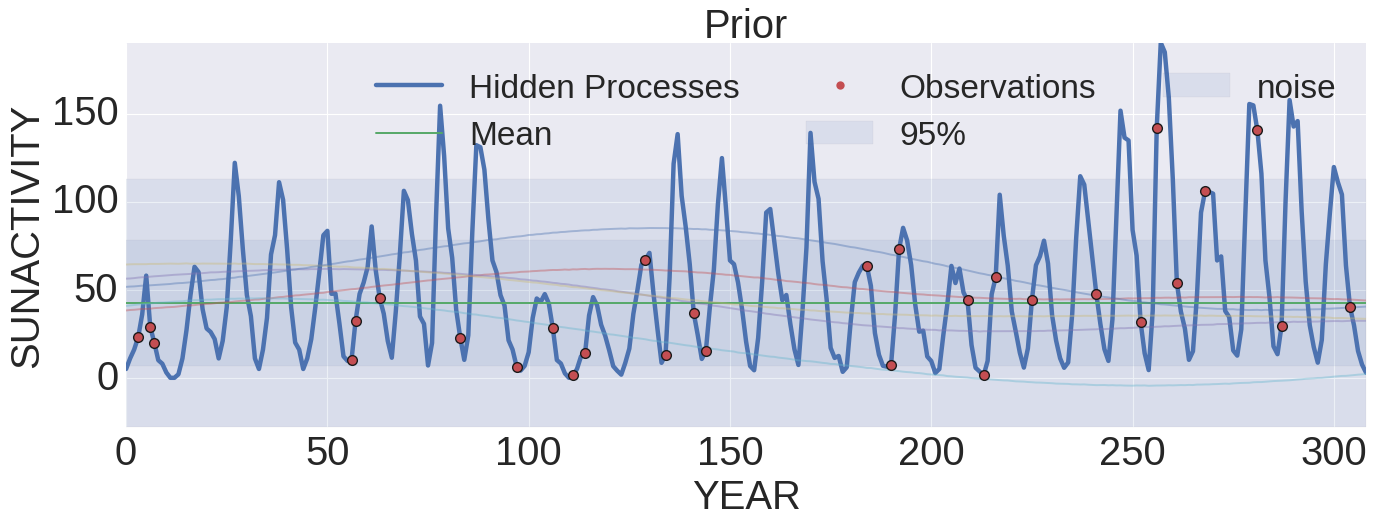

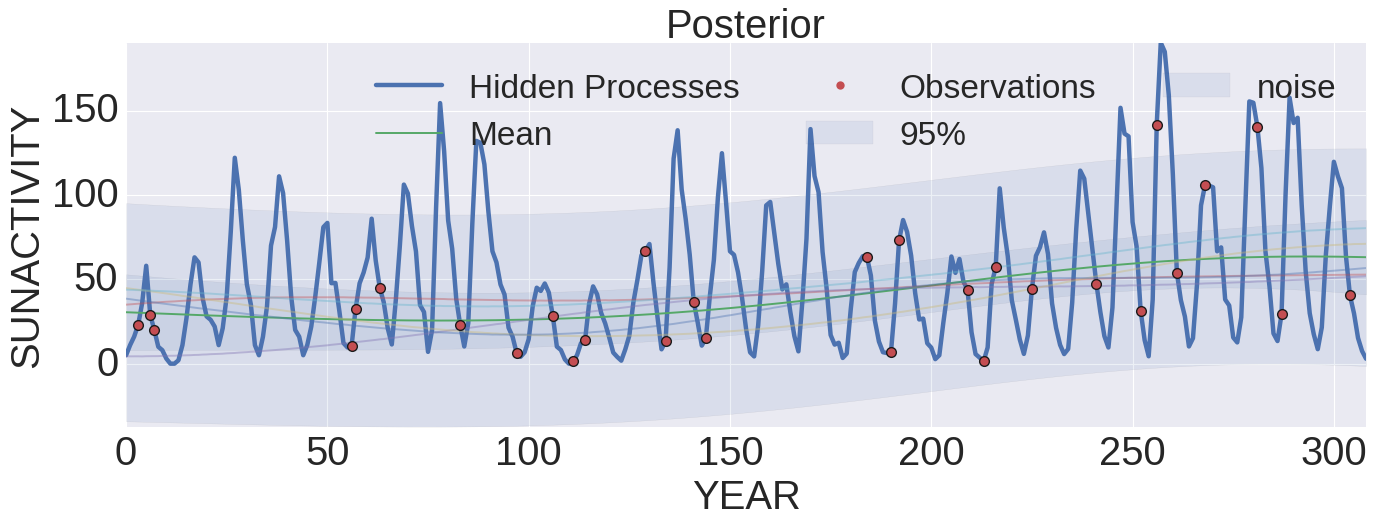

In [7]:
g3.print(gp.eval_params(params_map))
gp.plot(params_map, samples=5, prior=True, title='Prior')
g3.show()
gp.plot(params_map, samples=5, title='Posterior')
g3.show()

## Find MAP from random points

{'GP_Bias_Bias': array(42.63241195678711, dtype=float32),
 'GP_Noise_var_log_': array(6.862424373626709, dtype=float32),
 'GP_SE_rate_log_': array([-4.46448135], dtype=float32),
 'GP_SE_var_log_': array(5.8090386390686035, dtype=float32),
 '_l1': 31.937289712652802,
 '_l2': 1673.1911540462625,
 '_ll': array(-147.6981201171875, dtype=float32)}


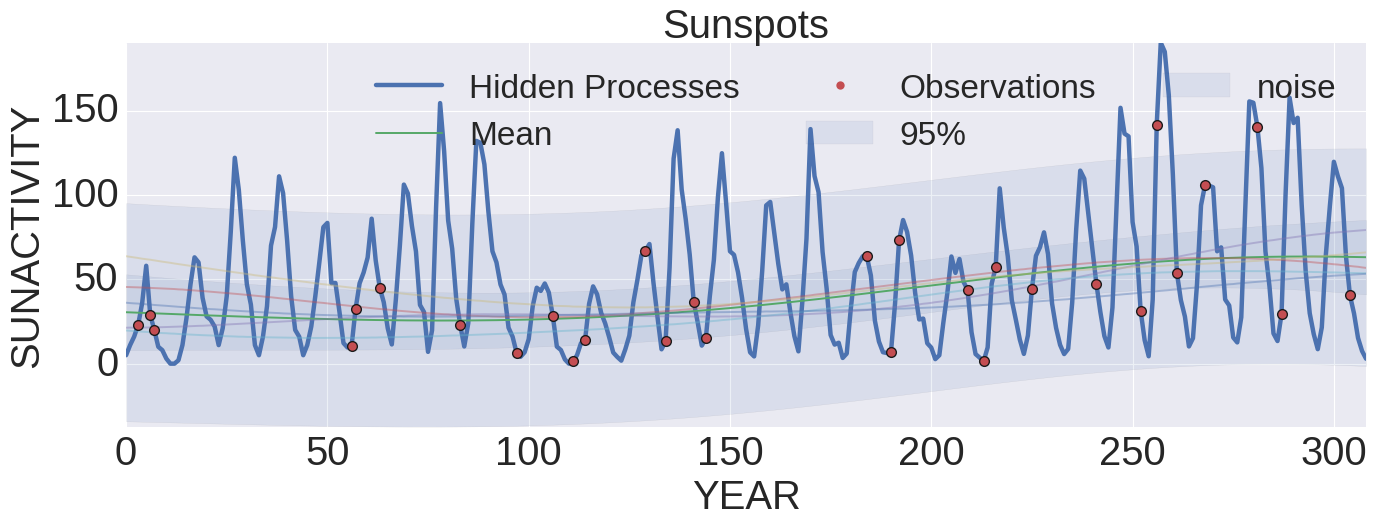

{'GP_Bias_Bias': array(42.658409118652344, dtype=float32),
 'GP_Noise_var_log_': array(6.862828731536865, dtype=float32),
 'GP_SE_rate_log_': array([-4.4643302], dtype=float32),
 'GP_SE_var_log_': array(5.810835361480713, dtype=float32),
 '_l1': 31.937634171174178,
 '_l2': 1673.1686086014415,
 '_ll': array(-147.6981201171875, dtype=float32)}


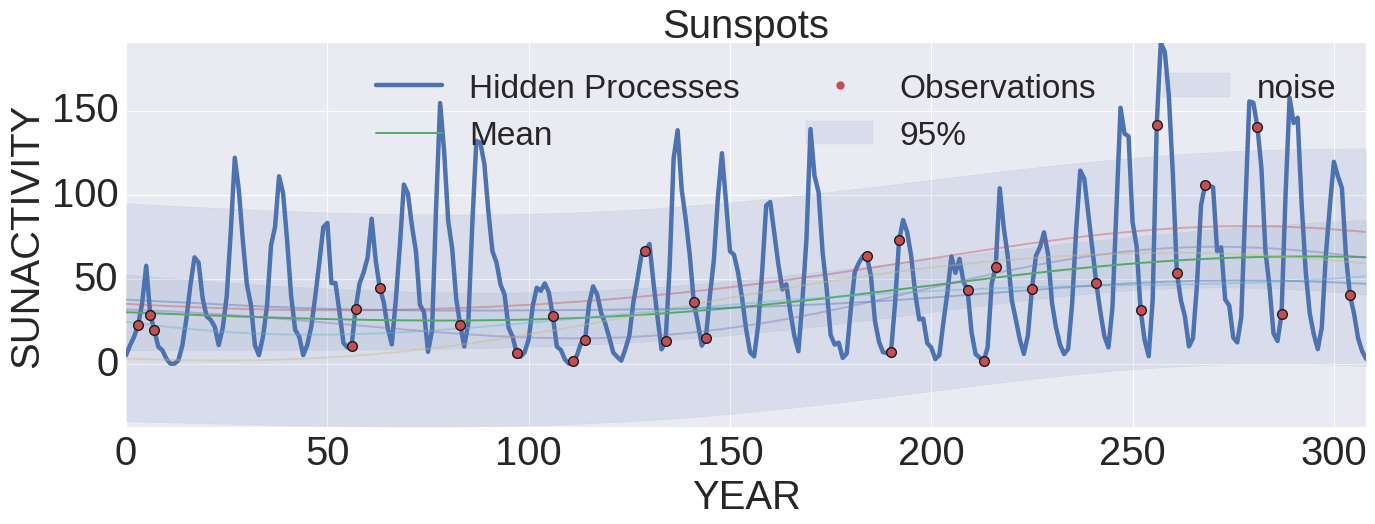

{'GP_Bias_Bias': array(42.63288116455078, dtype=float32),
 'GP_Noise_var_log_': array(6.8621506690979, dtype=float32),
 'GP_SE_rate_log_': array([-4.46447849], dtype=float32),
 'GP_SE_var_log_': array(5.810126781463623, dtype=float32),
 '_l1': 31.937722322778793,
 '_l2': 1673.2428261491905,
 '_ll': array(-147.6981201171875, dtype=float32)}


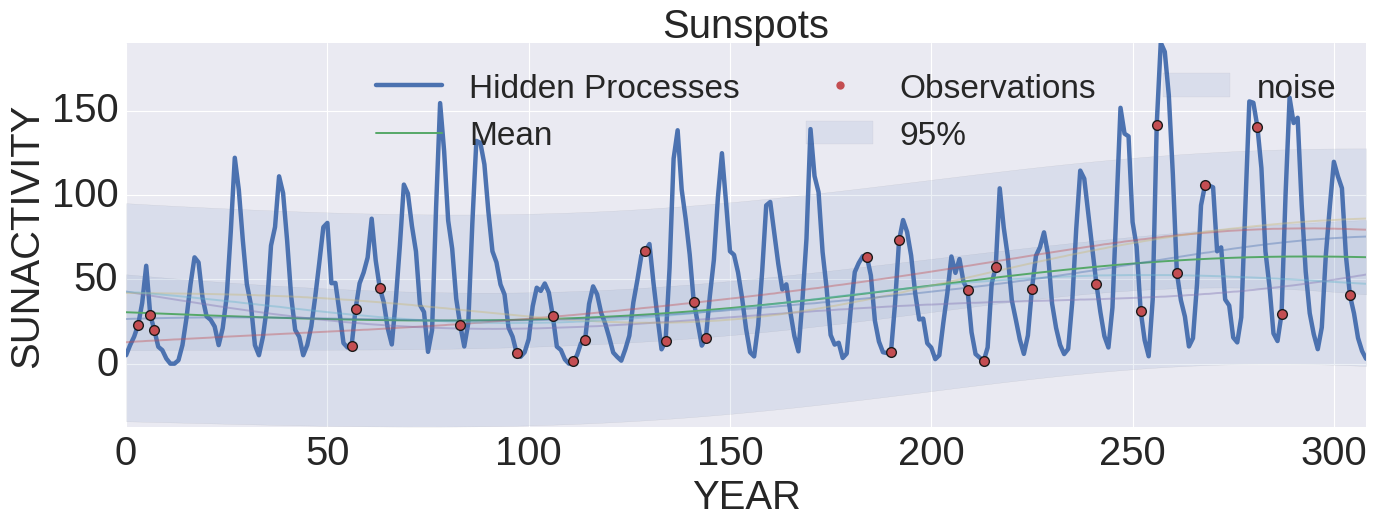

{'GP_Bias_Bias': array(42.62544250488281, dtype=float32),
 'GP_Noise_var_log_': array(6.862269401550293, dtype=float32),
 'GP_SE_rate_log_': array([-4.46354437], dtype=float32),
 'GP_SE_var_log_': array(5.809084892272949, dtype=float32),
 '_l1': 31.93747625011456,
 '_l2': 1673.2005383565042,
 '_ll': array(-147.6981201171875, dtype=float32)}


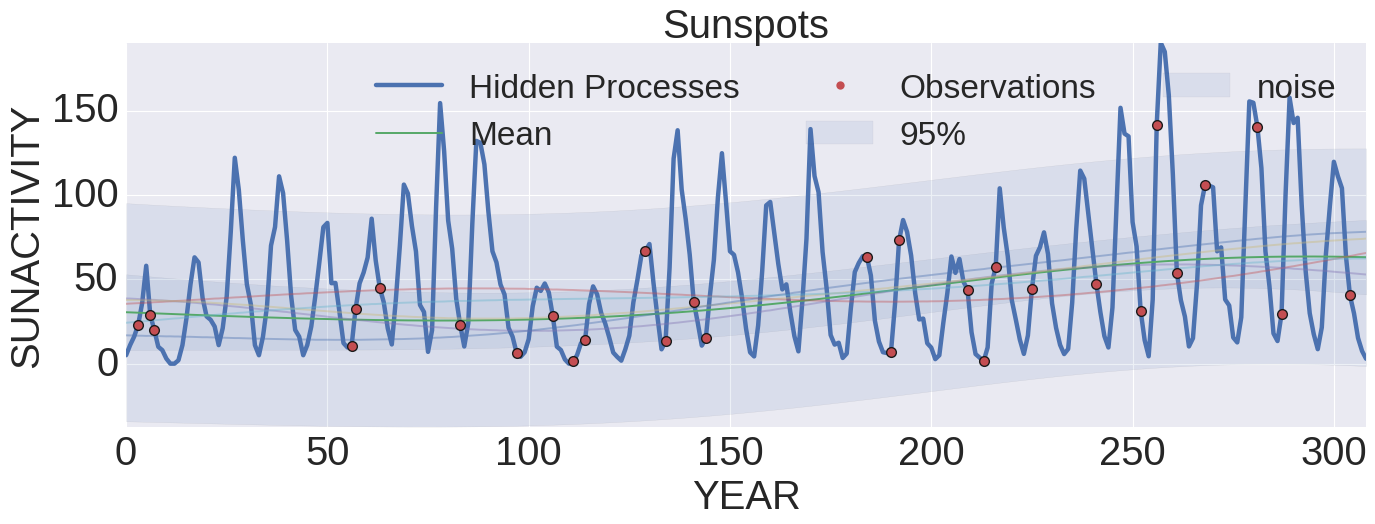

{'GP_Bias_Bias': array(42.67894744873047, dtype=float32),
 'GP_Noise_var_log_': array(6.862031936645508, dtype=float32),
 'GP_SE_rate_log_': array([-4.46583462], dtype=float32),
 'GP_SE_var_log_': array(5.811966419219971, dtype=float32),
 '_l1': 31.93801047439328,
 '_l2': 1673.2149251272931,
 '_ll': array(-147.6981201171875, dtype=float32)}


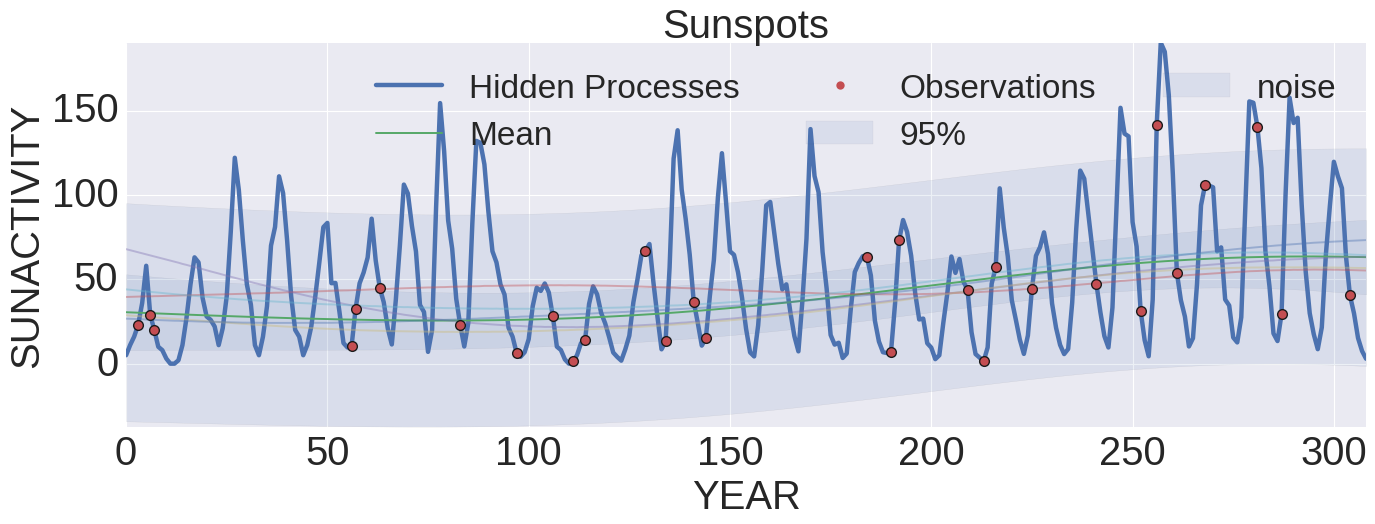

In [8]:
for k in range(5):
    init_params = gp.params_random(gp.params_widget, sigma=0.2)
    params = gp.find_MAP(init_params, points=2, display=False)
    g3.print(gp.eval_params(params))
    gp.plot(params, samples=5)
    g3.show()

## Get prediction and custom plot

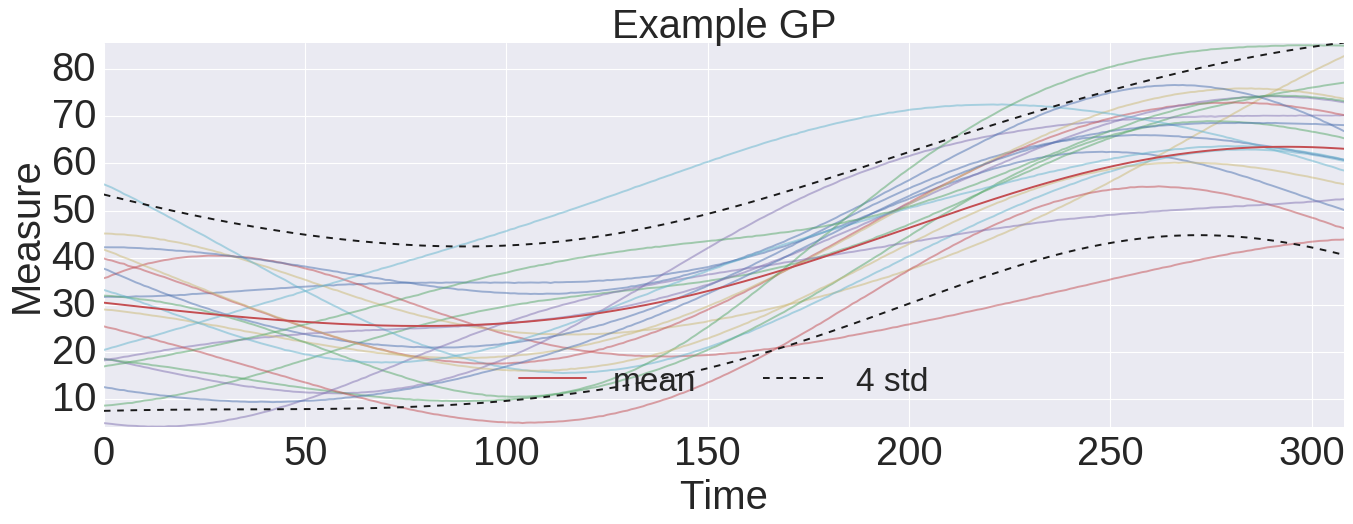

In [9]:
prediction = gp.predict(params, samples=20)
mu, std, samples = prediction.mean, prediction.std, prediction.samples
g3.plot(samples, alpha=0.5)
g3.plot(mu, 'r', label='mean')
g3.plot(mu + 2*std, '--k', label='4 std')
g3.plot(mu - 2*std, '--k')
g3.plot_text('Example GP', 'Time', 'Measure')
g3.plot_save('images/gp_sunspots3.pdf')

# Sampling Hyperparameters with Ensemble MCMC

In [10]:
datatrace = gp.sample_hypers(start=params, samples=10000, chains=10)
datatrace

Sampling 4 variables, 10 chains, 10000 times (None temps)


100%|██████████| 10000/10000 [00:45<00:00, 218.38it/s]


GP_Noise_var_log_  GP_SE_rate_log___0  GP_SE_var_log_  GP_Bias_Bias  \
0               7.068131           -4.385381        5.919274     41.161553   
1               7.032893           -4.345495        5.849692     41.522895   
2               7.025528           -4.327540        6.668841     39.553487   
3               7.025528           -4.327540        6.668841     39.553487   
4               7.015135           -4.302204        7.824677     36.774610   
5               6.949005           -4.224079        7.977566     36.757420   
6               6.949005           -4.224079        7.977566     36.757420   
7               6.949005           -4.224079        7.977566     36.757420   
8               6.949005           -4.224079        7.977566     36.757420   
9               7.061816           -4.330090        7.873386     36.892485   
10              6.954682           -4.228768        7.897291     36.550908   
11              6.954682           -4.228768        7.897291     36.550908   
12              6.954682           -4.228768        7.897291     36.550908   
13              6.954184           -4.228137        7.897247     36.548503   
14              6.665432           -3.861945        7.871817     35.154447   
15              6.672336           -3.786631        7.948786     34.414732   
16              6.674002           -3.830951        7.914330     34.074347   
17              6.681442           -3.762018        8.421185     34.763945   
18              6.681442           -3.762018        8.421185     34.763945   
19              6.681442           -3.762018        8.421185     34.763945   
20              6.796927           -3.813944        7.736866     36.628002   
21              6.796927           -3.813944        7.736866     36.628002   
22              6.796927           -3.813944        7.736866     36.628002   
23              6.778815           -4.002521        7.568036     35.905578   
24              6.706756           -3.925267        7.763222     36.431437   
25              6.706756           -3.925267        7.763222     36.431437   
26              6.854723           -4.056811        7.321087     35.179590   
27              6.993409           -4.204831        6.844509     34.400026   
28              6.993409           -4.204831        6.844509     34.400026   
29              7.151934           -4.017668        6.773040     28.265396   
...                  ...                 ...             ...           ...   
99970          -2.343282           35.380157        7.013289     39.211990   
99971          -2.343282           35.380157        7.013289     39.211990   
99972          -2.696674           34.822785        7.052740     39.231620   
99973          -2.696674           34.822785        7.052740     39.231620   
99974          -2.696674           34.822785        7.052740     39.231620   
99975          -2.696674           34.822785        7.052740     39.231620   
99976          -2.696674           34.822785        7.052740     39.231620   
99977          -2.696674           34.822785        7.052740     39.231620   
99978          -2.696674           34.822785        7.052740     39.231620   
99979          -2.696674           34.822785        7.052740     39.231620   
99980          -2.696674           34.822785        7.052740     39.231620   
99981          -2.696674           34.822785        7.052740     39.231620   
99982          -2.696674           34.822785        7.052740     39.231620   
99983          -2.696674           34.822785        7.052740     39.231620   
99984          -7.404637           43.231046        7.213351     38.689885   
99985          -7.404637           43.231046        7.213351     38.689885   
99986          -7.404637           43.231046        7.213351     38.689885   
99987          -7.404637           43.231046        7.213351     38.689885   
99988          -7.404637           43.231046        7.213351     38.689885   
99989          -7.404637     

## Convergence Diagnostics

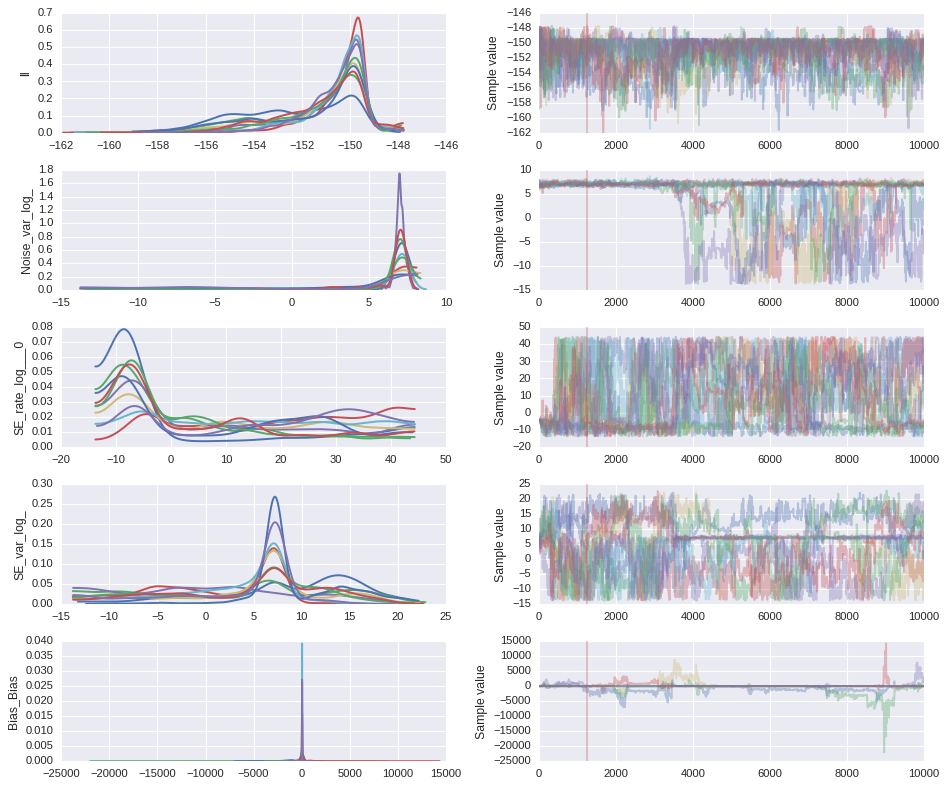

In [11]:
g3.style_seaborn()
g3.plot_datatrace(datatrace)

## Plot Marginals and reference parameters

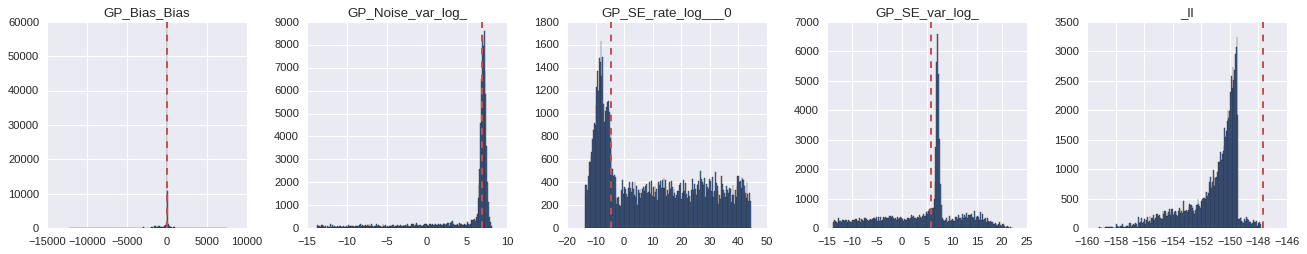

In [12]:
g3.hist_datatrace(datatrace, reference=gp.eval_params(params))

## Clustering of parameters and plot Bivariate distributions

In [13]:
g3.cluster_datatrace(gp, datatrace)

<function g3py.bayesian.average.cluster_datatrace.<locals>._cluster>

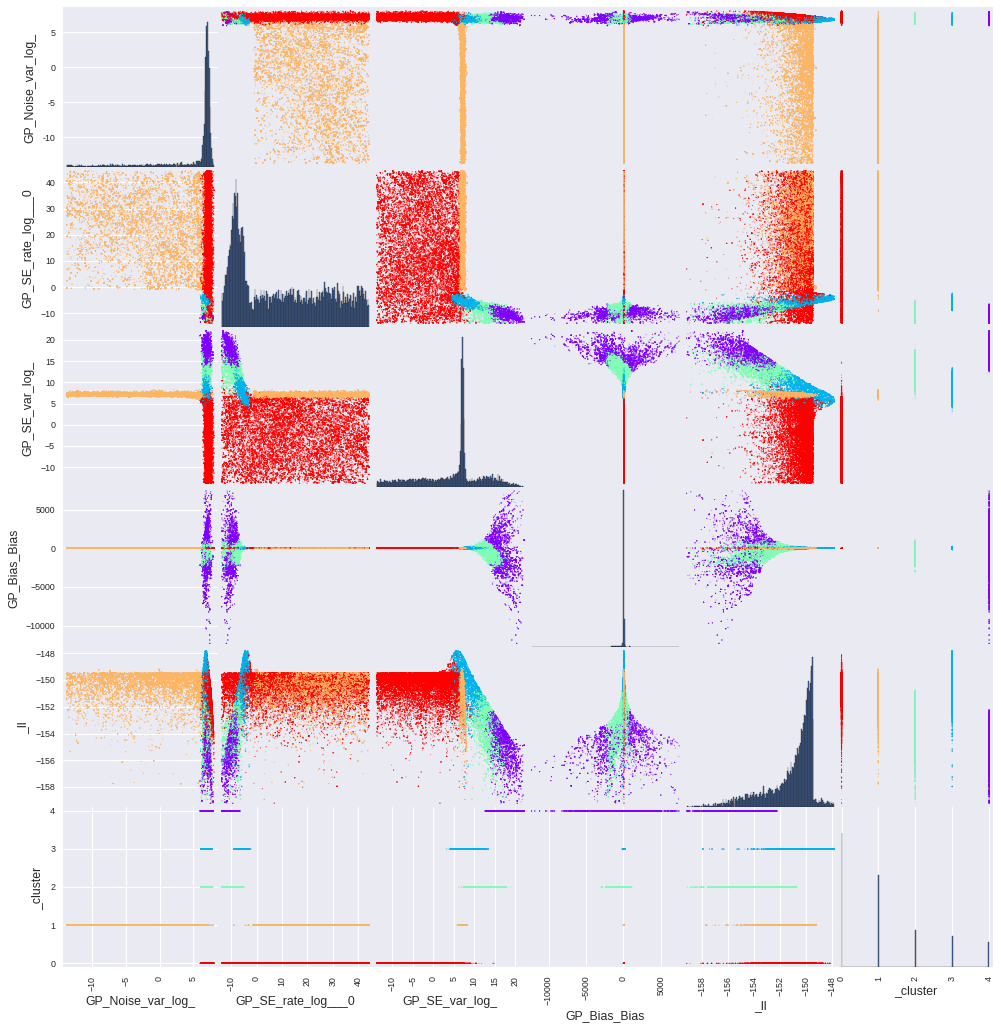

In [39]:
g3.scatter_datatrace(datatrace)

## Model Selection

In [22]:
candidates = g3.find_candidates(datatrace, ll=1, by_cluster=True)
candidates

GP_Noise_var_log_  GP_SE_rate_log___0  GP_SE_var_log_  \
ll[327]            -5.808135           -0.450763        7.371746   
ll[37556]           6.783098           -0.603469        6.689780   
ll[81787]           2.522598            1.026919        7.287875   
ll[39151]           7.332922           13.411404      -10.110332   
ll[77153]           7.474529           -8.725853        5.029757   

           GP_Bias_Bias  _nchain  _niter  _burnin  _outlayer         _ll  \
ll[327]       54.216008        0     327    False      False -150.301483   
ll[37556]     59.311322        3    7556     True       True -151.879639   
ll[81787]     55.986819        8    1787     True       True -152.455719   
ll[39151]     55.873643        3    9151     True       True -152.498901   
ll[77153]     68.418191        7    7153     True       True -153.669235   

           _cluster  
ll[327]           3  
ll[37556]         1  
ll[81787]         0  
ll[39151]         2  
ll[77153]         4

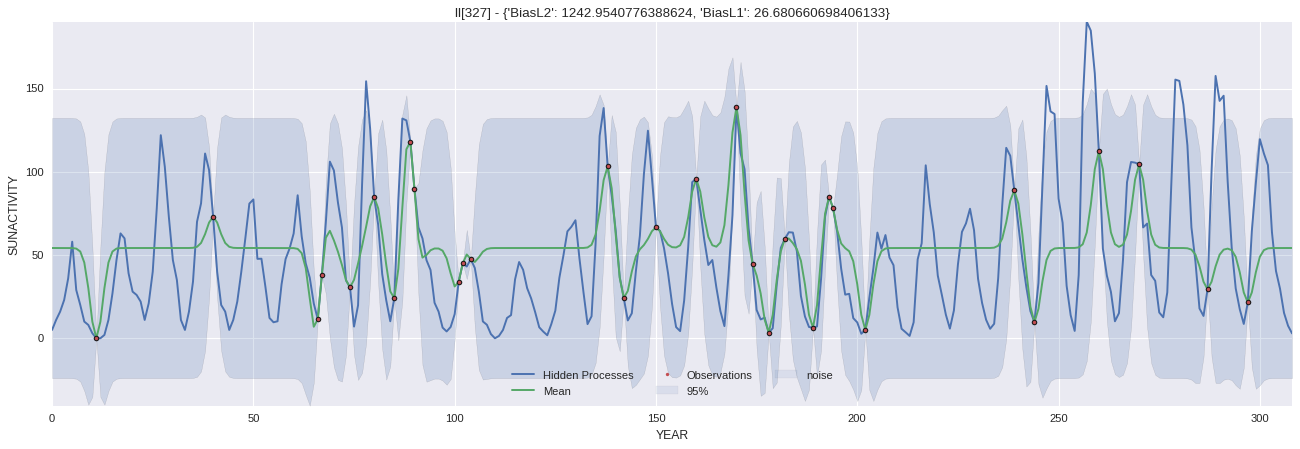

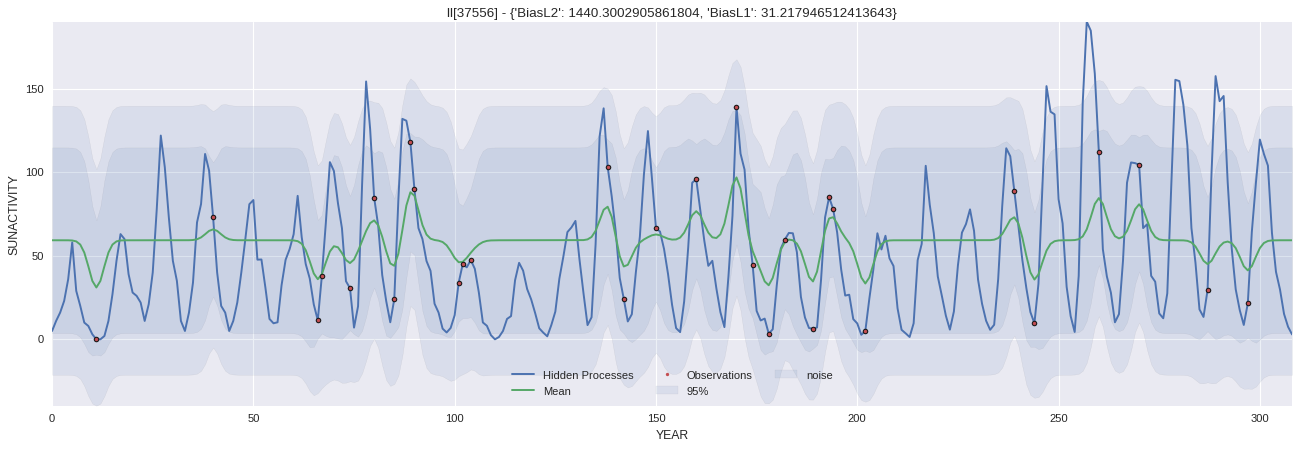

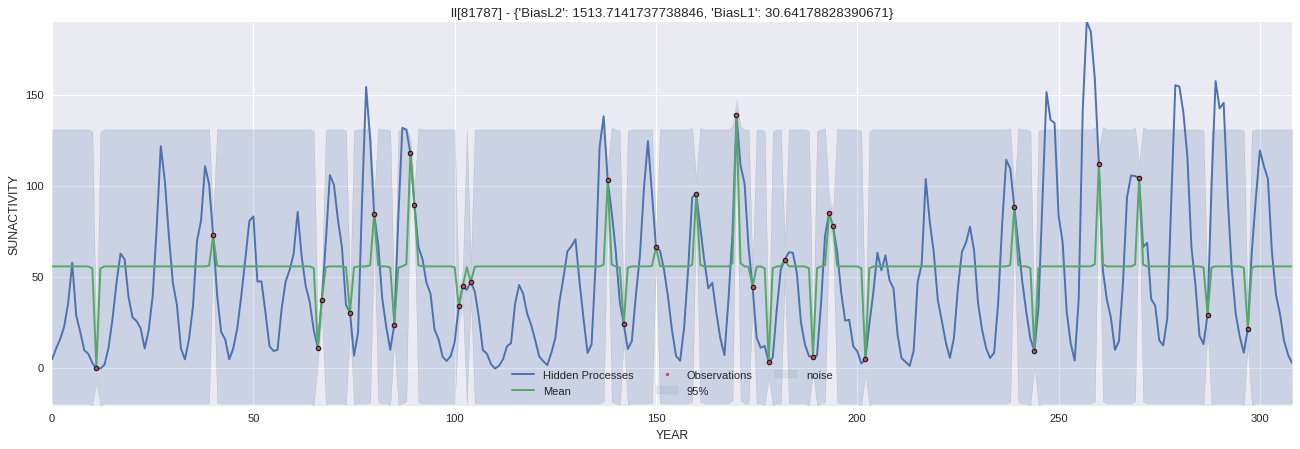

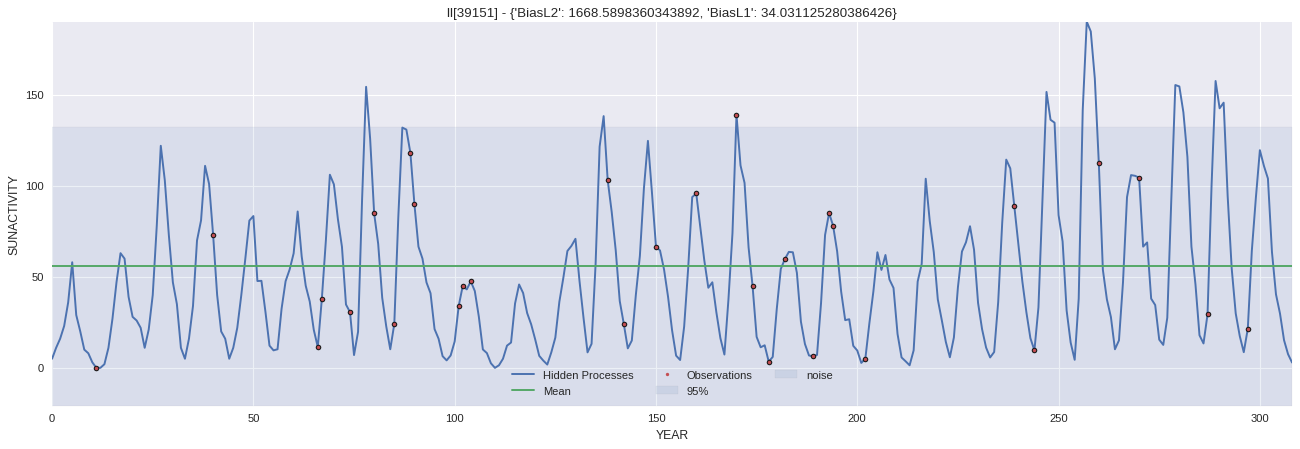

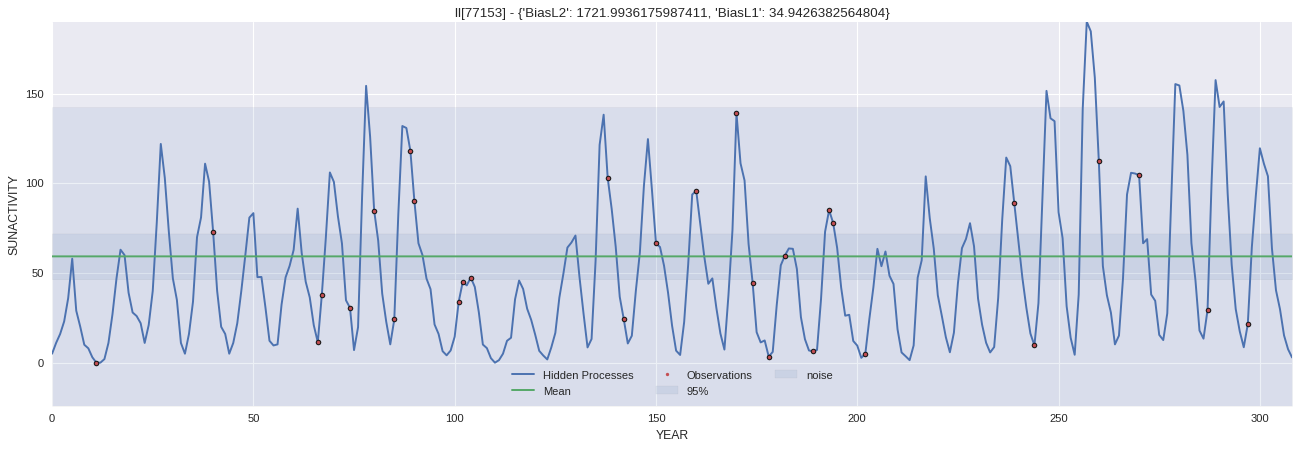

In [23]:
gp.plot_datatrace(candidates)

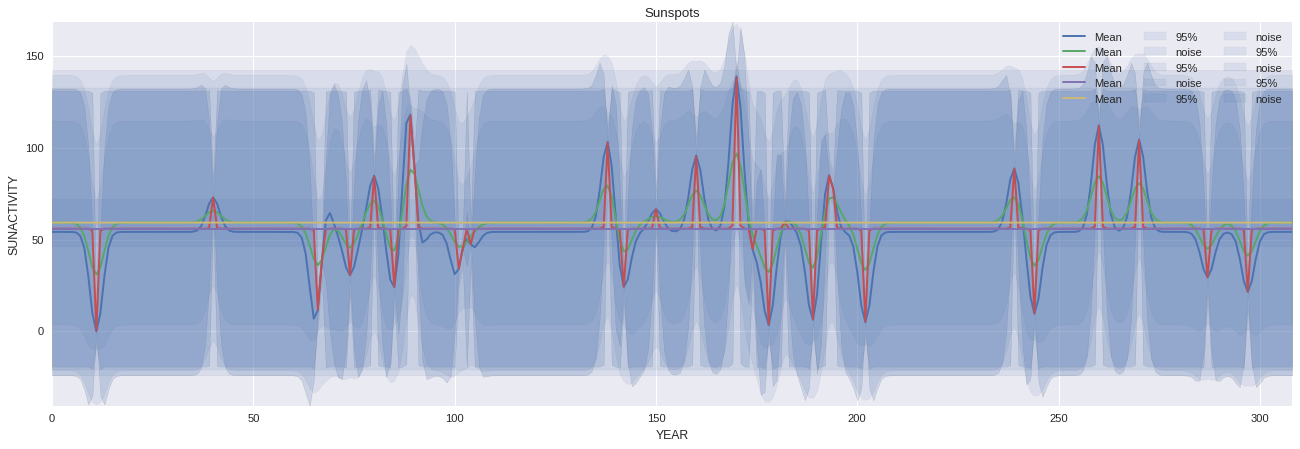

In [24]:
gp.plot_datatrace(candidates, overlap=True, limit=5, var=False, noise=False, samples=0, data=False, loc=True)

## Model Average

In [25]:
average = gp.average(candidates, quantiles=True, quantiles_noise=True)
average

{'BiasL1': 31.50283180631866,
 'BiasL2': 1517.5103991264116,
 'mean': array([ 56.93469238,  56.93469238,  56.93465424,  56.93426514,
         56.93045044,  56.90145111,  56.73238373,  55.99659348,
         53.71788788,  49.01132202,  42.98928452,  29.33412743,
         42.9892807 ,  49.01131058,  53.71787262,  55.9965744 ,
         56.73236084,  56.90142059,  56.93041229,  56.93422318,
         56.93460846,  56.93463898,  56.93463898,  56.93463135,
         56.93463135,  56.93463135,  56.93462372,  56.93462372,
         56.9346199 ,  56.9346199 ,  56.9346199 ,  56.93462372,
         56.93471527,  56.93564987,  56.94312286,  56.98914337,
         57.19985962,  57.8788681 ,  59.32017136,  61.19340134,
         65.37032318,  61.19340134,  59.32016754,  57.87886429,
         57.19985199,  56.98912811,  56.94310379,  56.9356308 ,
         56.93469238,  56.93460083,  56.9345932 ,  56.9345932 ,
         56.93458939,  56.93458939,  56.93458939,  56.93458939,
         56.93458939,  56.93456268,

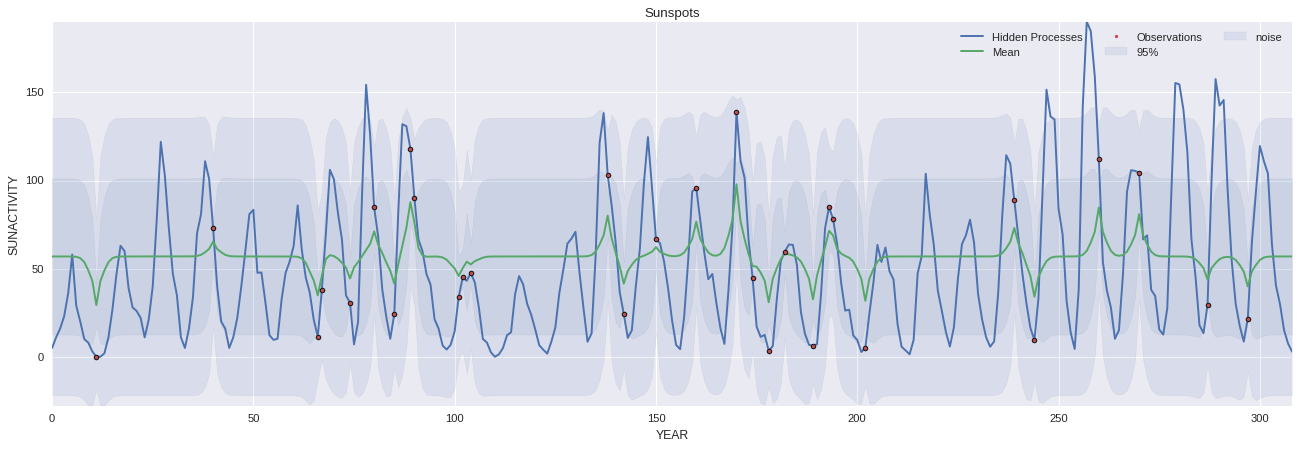

In [26]:
gp.plot(values=average)

## Sampling Particles

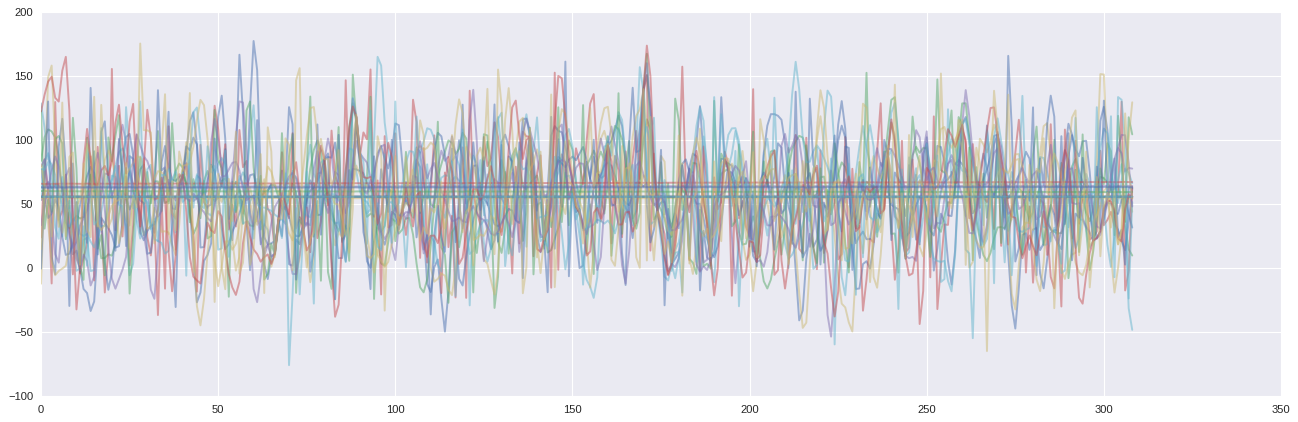

In [27]:
particles = gp.particles(candidates, nsamples=25)
g3.plot(particles, alpha=0.5)

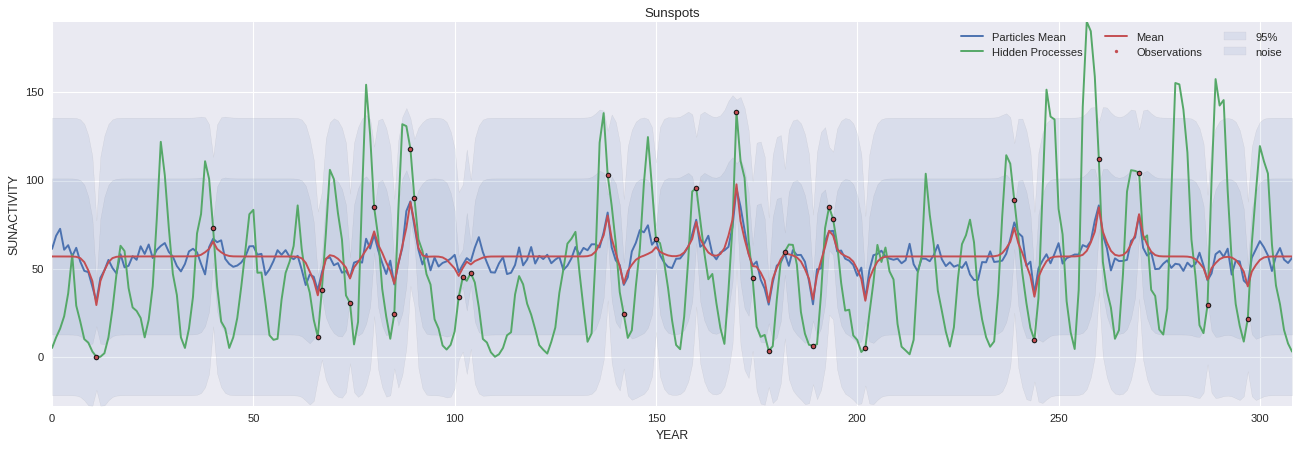

In [28]:
g3.plot(particles.mean(axis=1), label='Particles Mean')
gp.plot(values=average)

## Conditional and Marginal Datatrace as Empirical Distribution

#10000 (10.0 %)


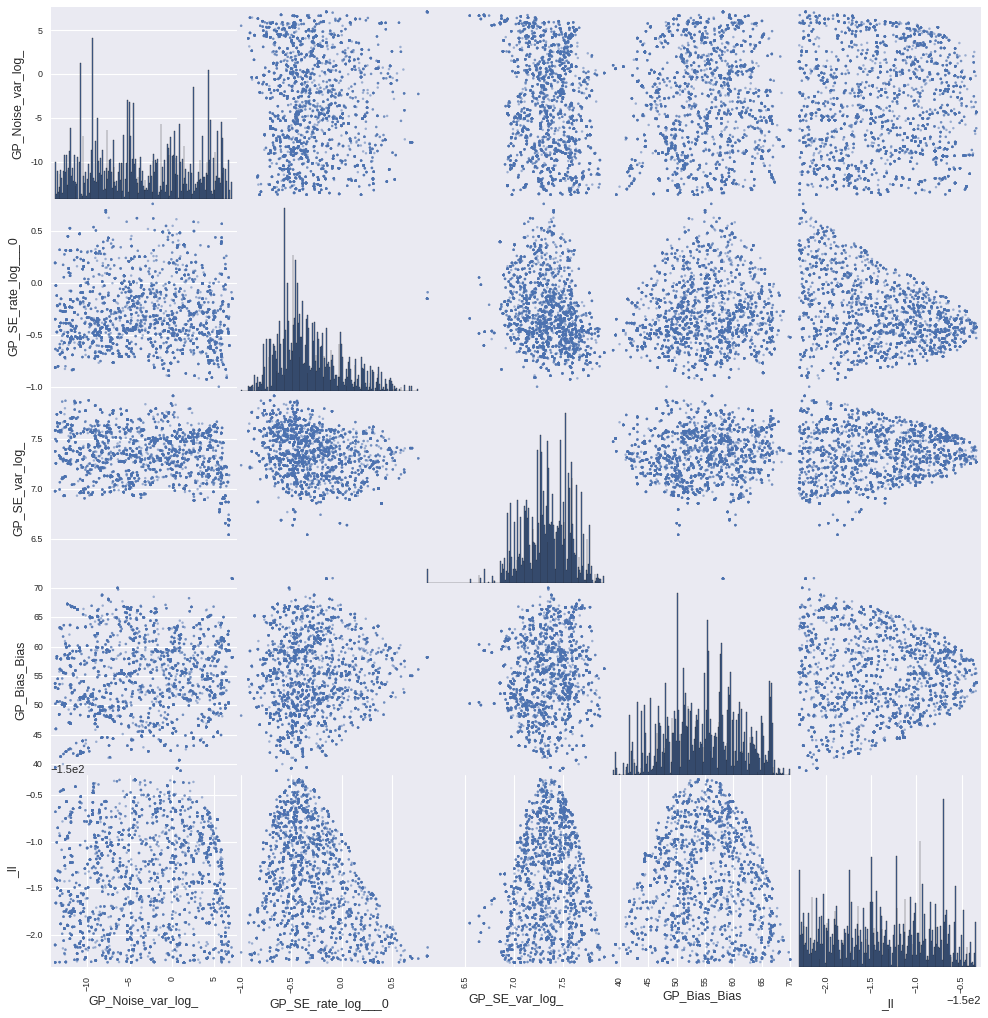

In [29]:
selected = g3.conditional_datatrace(datatrace, lambda df: df._ll > df._ll.quantile(0.9))
selected = g3.marginal_datatrace(selected, drop='_cluster')
g3.scatter_datatrace(selected)

## Kernel Density Estimation of Datatrace for sampling

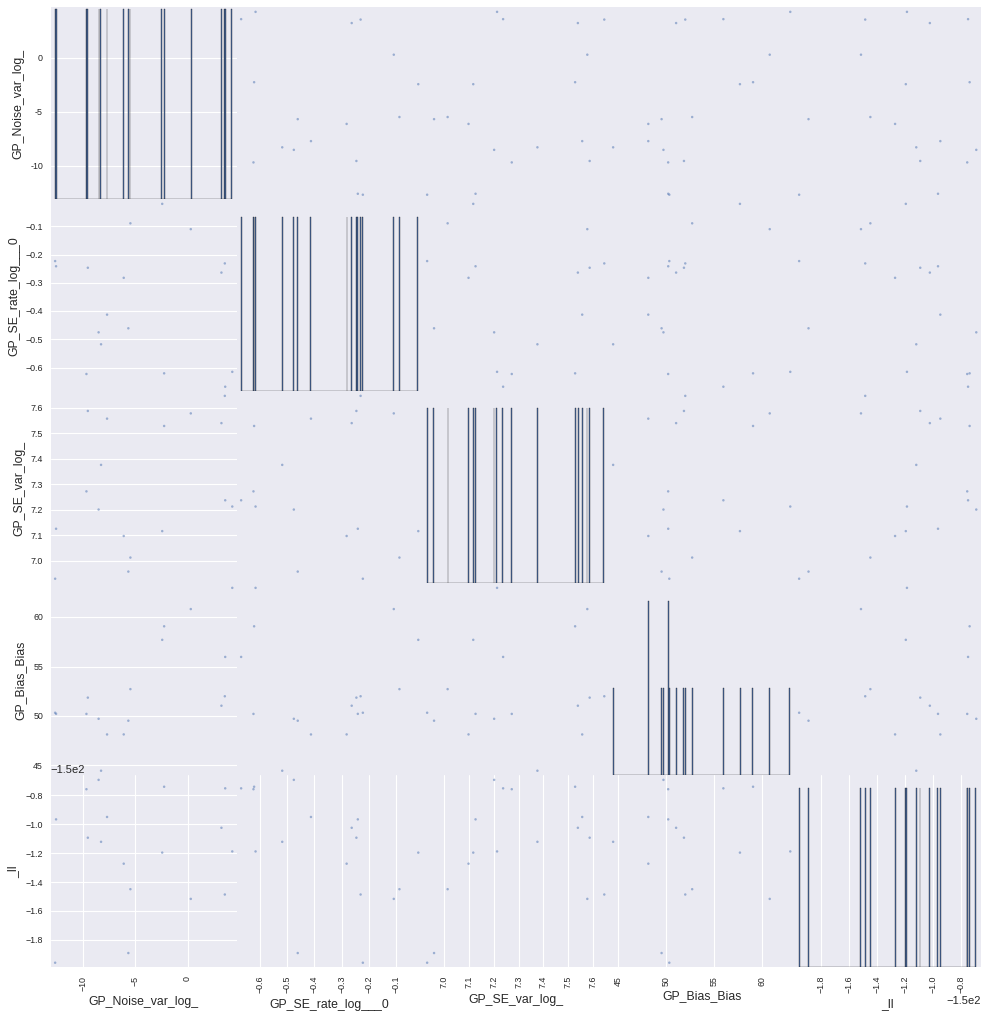

In [30]:
kde = g3.datatrace_to_kde(gp, selected)
models = g3.kde_to_datatrace(gp, kde, nsamples=25)
models = g3.marginal_datatrace(models, drop='_cluster')
g3.scatter_datatrace(models)

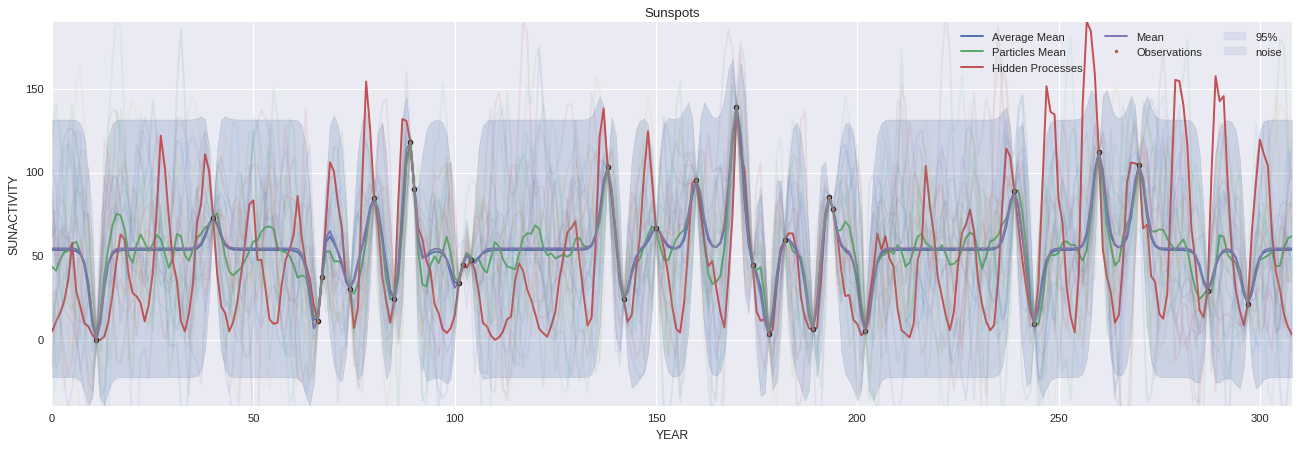

In [52]:
average = gp.average(models, quantiles=True, quantiles_noise=True)
particles = gp.particles(models)

g3.plot(average.mean, label='Average Mean')
g3.plot(particles.mean(axis=1), label='Particles Mean')
gp.plot(params_map)
g3.plot(particles, alpha=0.1)